In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
import random

In [2]:
# The epoint from this cell is sanity check "debugging". If the files contain the features we are looking for, we go deeper in our investigation.

#path the folder that host the whole files
folder = r"D:\VolveWITSMLasCSV"

#Since we have the file that host the mojourity of Volve dataset, lets explorer the folder as a whole
filelist = glob(os.path.join(folder, "*time.csv"))

#we'll search for the features that our pipline will built on top of it
keywords = ["torque", "hook", "rpm", "standpipe", "pit", "block", "depth"]

#loop over each keyword
for key in keywords:
    print(f"\n=== Searching for: {key} ===\n")
    search = key.lower()
    #Now, its to loop over each file
    for j in filelist:
        filename = pd.read_csv(j, nrows=1) # reda only headers
        cols = [c for c in filename.columns if search in c.lower()]
        if cols: #matching cols
            print("File:", os.path.basename(j))
            for c in cols:
                print(" ", c)


=== Searching for: torque ===

File: NA-NA-15_$47$_9-F-5 time.csv
  Average Surface Torque kN.m
File: Norway-NA-15_$47$_9-F-1 time.csv
  Average Surface Torque kN.m
File: Norway-NA-15_$47$_9-F-9 A time.csv
  Torque loss kN.m
  Average Surface Torque kN.m
File: Norway-Statoil-15_$47$_9-F-12 time.csv
  Average Surface Torque kN.m
  Maximum Surface Torque kN.m
  Maximum Surface Torque 
File: Norway-Statoil-15_$47$_9-F-7 time.csv
  Average Surface Torque kN.m
  Maximum Surface Torque 
File: Norway-Statoil-NO 15_$47$_9-F-1 C 0 time.csv
  Torque - Corrected N.m
  Torque - Average N.m
  Torque Offset - Tare N.m
  Surface Torque Average N.m
  Surface Torque Average N.m.1
  Torque In Amps A
  Torque In Amps A.1
  Torque In Amps A.2
  Torque In Amps A.3
  Surface Torque Average N.m.2
  TORQUE_AVG kN.m
File: Norway-Statoil-NO 15_$47$_9-F-1 C A time.csv
  TORQUE_AVG kN.m
  Torque - Corrected N.m
  Torque - Average N.m
  Torque Offset - Tare N.m
  Torque In Amps A
  Surface Torque Average N.m
  To

In [3]:
#Lets see the fiels sizes

In [4]:
# import os
# from glob import glob
# import pandas as pd
# import warnings

# warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

# folder = r"D:\VolveWITSMLasCSV"
# filelist = glob(os.path.join(folder, "*time.csv"))

# for j in filelist:
#     # Read just the header to get number of columns
#     header_df = pd.read_csv(j, nrows=0)
#     cols = len(header_df.columns)

#     total_rows = 0
#     total_na = 0
#     total_cells = 0

#     # Process the file in chunks (adjust chunksize if needed)
#     for chunk in pd.read_csv(j, chunksize=100_000):
#         total_rows += len(chunk)
#         total_na += chunk.isna().sum().sum()
#         total_cells += chunk.size

#     avg_missing = total_na / total_cells if total_cells > 0 else 0.0

#     print(
#         f"{os.path.basename(j):40s}  "
#         f"rows={total_rows:7d}, cols={cols:3d},  avg_missing={avg_missing:5.1%}"
#     )


In [5]:
import os
from glob import glob
import pandas as pd

folder = r"D:\VolveWITSMLasCSV"

#a list for time serise files in the folder
filelist = glob(os.path.join(folder, "*time.csv"))

summary = []

#loop over every file path in the list "filelist"
for j in filelist:
    header_df = pd.read_csv(j, nrows=0)
    cols = len(header_df.columns)

    #initialise a counters for the file
    total_rows = 0
    total_na = 0
    total_cells = 0

    #Since some files are giagentic and loading them will be problemetic, we'll split the loading into chuncks
    for chunk in pd.read_csv(j, chunksize=100_000):
        total_rows += len(chunk)
        total_na += chunk.isna().sum().sum()
        total_cells += chunk.size

    avg_missing = total_na / total_cells if total_cells > 0 else 0.0

    summary.append({
        "file": os.path.basename(j),
        "rows": total_rows,
        "cols": cols,
        "avg_missing": avg_missing,   # fraction between 0 and 1
    })

#convert the lsit of dicts into a dataframe from further processing
info = pd.DataFrame(summary)
#create a new col for percentages for interpretability
info["missing_pct"] = info["avg_missing"] * 100
info


C:\Users\algak\AppData\Local\Temp\ipykernel_20220\3965843419.py:23: DtypeWarning: Columns (1,2,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(j, chunksize=100_000):
C:\Users\algak\AppData\Local\Temp\ipykernel_20220\3965843419.py:23: DtypeWarning: Columns (1,4,8,9,49) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(j, chunksize=100_000):
C:\Users\algak\AppData\Local\Temp\ipykernel_20220\3965843419.py:23: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(j, chunksize=100_000):
C:\Users\algak\AppData\Local\Temp\ipykernel_20220\3965843419.py:23: DtypeWarning: Columns (119,146) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(j, chunksize=100_000):
C:\Users\algak\AppData\Local\Temp\ipykernel_20220\3965843419.py:23: DtypeWarning: Columns (119,146) have 

,file,rows,cols,avg_missing,missing_pct
0,NA-NA-15_$47$_9-F-5 time.csv,118988,66,0.239742,23.974203
1,Norway-NA-15_$47$_9-F-1 time.csv,68043,116,0.617886,61.788590
2,Norway-NA-15_$47$_9-F-9 A time.csv,419747,239,0.742046,74.204576
3,Norway-Statoil-15_$47$_9-F-12 time.csv,2086733,253,0.844364,84.436365
4,Norway-Statoil-15_$47$_9-F-7 time.csv,547786,135,0.678834,67.883388
5,Norway-Statoil-NO 15_$47$_9-F-1 C 0 time.csv,2883802,467,0.919221,91.922090
6,Norway-Statoil-NO 15_$47$_9-F-1 C A time.csv,1088288,512,0.935228,93.522832
7,Norway-Statoil-NO 15_$47$_9-F-1 C B time.csv,4528121,512,0.903436,90.343558
8,Norway-Statoil-NO 15_$47$_9-F-1 C C time.csv,5638805,636,0.926801,92.680103
9,Norway-Statoil-NO 15_$47$_9-F-11 A time.csv,1233090,474,0.917718,91.771813


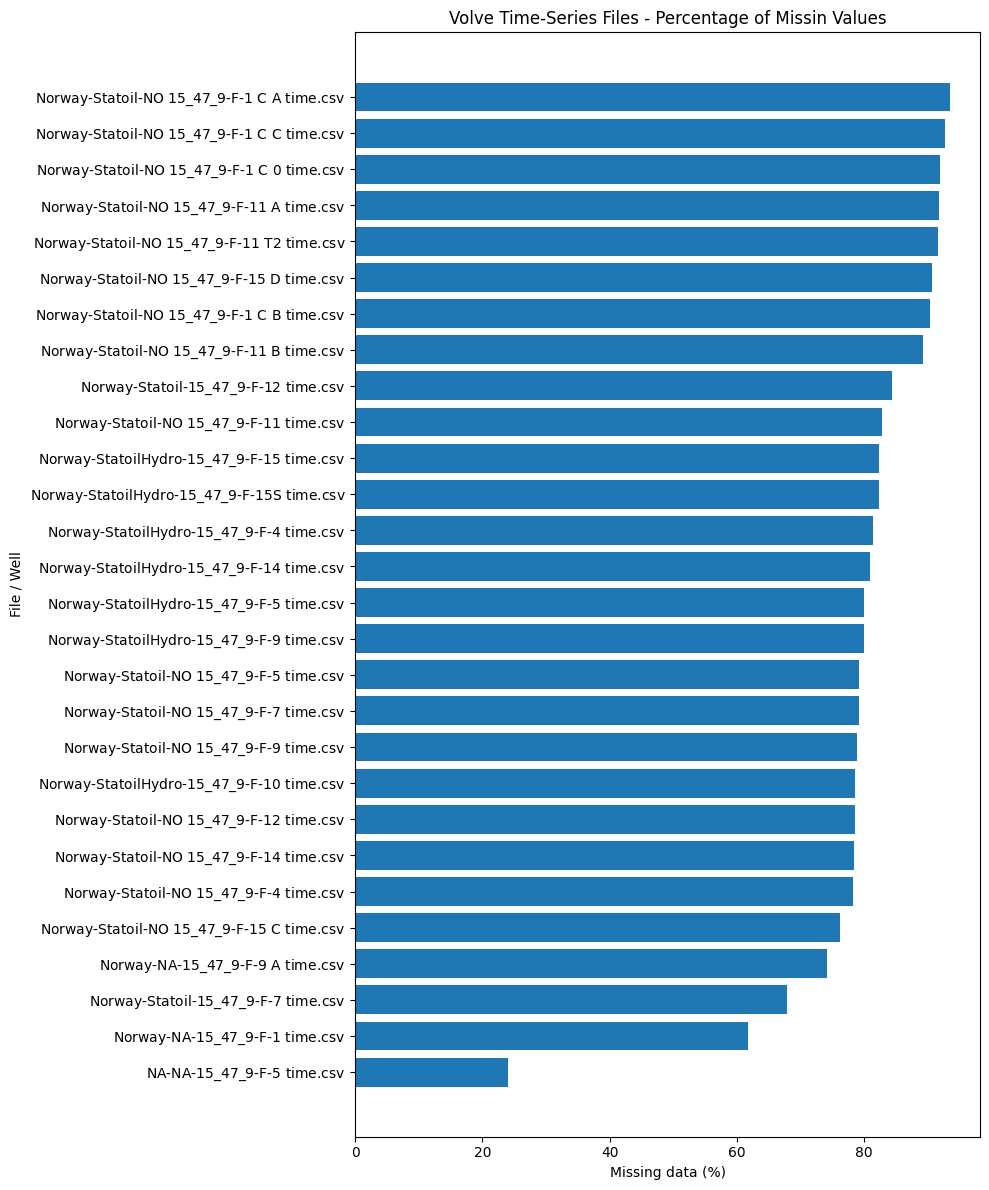

In [6]:
#sort the files by missign percentages
info_sorted = info.sort_values("missing_pct", ascending=False)
#we'll plot all teh files
subset = info_sorted

plt.figure(figsize=(10, 12))
plt.barh(subset["file"], subset["missing_pct"])

plt.xlabel("Missing data (%)")
plt.ylabel("File / Well")
plt.title("Volve Time-Series Files - Percentage of Missin Values")

# invert the yaxis, to see the highest missing values at top
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

# Figure: Illustrates the precentage of missing data for each Volve Time-Based wells## 
### Lets interprate this bar chart
### First: Each bar of these "blue lines" represent a well from our Volve Dataset.
- X-Axis - > represent precentage of the "missing Data"
- Y-Axis - > represent the wells (sorted, from most missing to tsh lowest)

* This "Bar-Chart" correspons to the Missing-Values in the recorded logs for each of these wells from Volve wells. 
## Interpertations:
1. The Top-bars represents the => Worst Logs, around 90%-92% is missing ! as in case (Norway-Statoil-NO 15_$47$_9-F-1 C C  and  Norway-Statoil-NO 15_$47$_9-F-1 C A )
2. The Bottom-Bars represents the => Best Logs, as we can see in case (NA-NA-15_$47$_9-F-5 with 21% missing and Norway-NA-15_$47$_9-F-1  with 61% missing).
3. Most wells having missing data between 70-90% which is a bit an issue except one with 24% and another one with 62%.
4. This processing confimrs that Volve Time-Based Dataset is suffering from an recordered log values from various wells.
5. IN this case, we'll take well (NA-NA-15_$47$_9-F-5 ) as our start candidate for training, where for well (Norway-NA-15_$47$_9-F-1 ) we need to work around to solve the missing data issues. Finally, for the rest wells, we'll try to use some of them like wells (Norway-Statoil-15_$47$_9-F-7, Norway-NA-15_$47$_9-F-9, and Norway-Statoil-NO 15_$47$_9-F-15 C)as refrencing wells for "Testing" after working on missing data part.


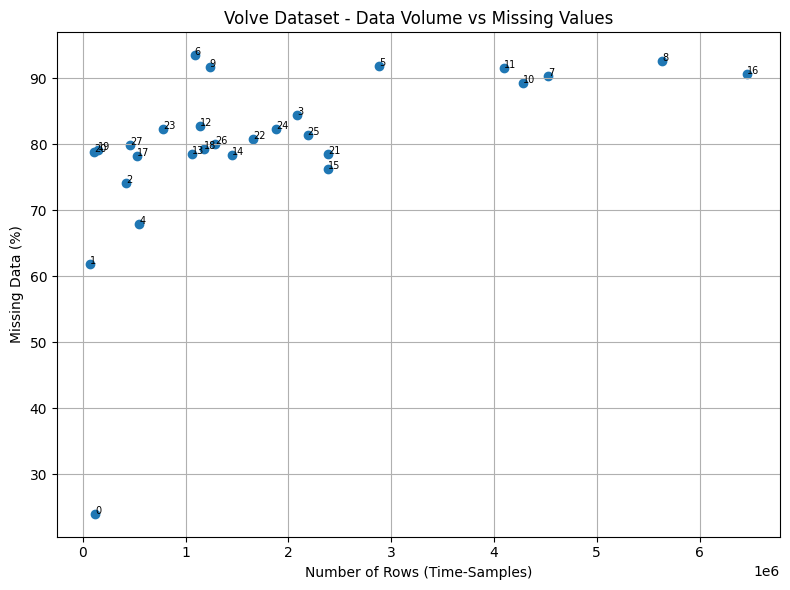

In [7]:
info = info.reset_index(drop=True)

plt.figure(figsize=(8, 6))
plt.scatter(info["rows"], info["missing_pct"])

for i, row in info.iterrows():
    plt.text(row["rows"], row["missing_pct"], str(i), fontsize=7)


plt.xlabel("Number of Rows (Time-Samples)")
plt.ylabel("Missing Data (%)")
plt.title("Volve Dataset - Data Volume vs Missing Values")
plt.grid(True)
plt.tight_layout()
plt.show() 

# Figure: The Percentage of Missing Data for Time-based Samples for Volve Dataset
* x-axis: number of rows, time-samples (in million)
* y-axis: missing percentage
* The Numeric labels : these are the wells index in our dataframe.
### The little number next to each dot is the well index from our data frame
## Interpertation
1. From the chart, the only well with less than 25% mssing data is on the bottom-left with few rows, ~124k
2. Most of the dots/wells are suffuring from 70-90% missing data.
3. For training the model, eigther to go with the far-righ top (more rows, and more missing) or bottom-left(less rows and less missing)


In [8]:
#Let view the datafram once more but without the "avg_missing" col
sorted_info = info.sort_values("missing_pct", ascending=True)

sorted_info[["file", "rows", "cols", "missing_pct"]]

,file,rows,cols,missing_pct
0,NA-NA-15_$47$_9-F-5 time.csv,118988,66,23.974203
1,Norway-NA-15_$47$_9-F-1 time.csv,68043,116,61.788590
4,Norway-Statoil-15_$47$_9-F-7 time.csv,547786,135,67.883388
2,Norway-NA-15_$47$_9-F-9 A time.csv,419747,239,74.204576
15,Norway-Statoil-NO 15_$47$_9-F-15 C time.csv,2383786,210,76.221251
17,Norway-Statoil-NO 15_$47$_9-F-4 time.csv,522850,231,78.315045
14,Norway-Statoil-NO 15_$47$_9-F-14 time.csv,1450097,231,78.467903
13,Norway-Statoil-NO 15_$47$_9-F-12 time.csv,1065092,231,78.555601
21,Norway-StatoilHydro-15_$47$_9-F-10 time.csv,2387147,247,78.611457
20,Norway-Statoil-NO 15_$47$_9-F-9 time.csv,113271,231,78.854443


## Notes
1.  We compared these analyses with teh orginal work by "Andrej_Volve_Paper", and the results are almost identical, where the missing data for well F-9A are more than 80% within the depth-based file, whereas 74% within the time-based oens.
2. The reason for thes efrequent un systematic missing data with this dataset according to [Andrej Vovle Paper] are due to uneven recording for different logs from different sensors for different time stamps.
3. 

# Picking The Wells for Our PipeLine
### As Any Machine Learning Pipeline, we will need data for the follwoing three phases:

1. Training 
2. Validation
3. Testing

### From The Two Graphs above, we get to the following conclusions:

1. The Best Wells for Our Training are: 
* 
*
*

2. For our Validation:
* 
*
3. For Testing:
* 
* 

In [19]:
info_sorted

,file,rows,cols,avg_missing,missing_pct
6,Norway-Statoil-NO 15_$47$_9-F-1 C A time.csv,1088288,512,0.935228,93.522832
8,Norway-Statoil-NO 15_$47$_9-F-1 C C time.csv,5638805,636,0.926801,92.680103
5,Norway-Statoil-NO 15_$47$_9-F-1 C 0 time.csv,2883802,467,0.919221,91.922090
9,Norway-Statoil-NO 15_$47$_9-F-11 A time.csv,1233090,474,0.917718,91.771813
11,Norway-Statoil-NO 15_$47$_9-F-11 T2 time.csv,4100405,515,0.915669,91.566924
16,Norway-Statoil-NO 15_$47$_9-F-15 D time.csv,6462926,507,0.906436,90.643635
7,Norway-Statoil-NO 15_$47$_9-F-1 C B time.csv,4528121,512,0.903436,90.343558
10,Norway-Statoil-NO 15_$47$_9-F-11 B time.csv,4278693,481,0.892795,89.279466
3,Norway-Statoil-15_$47$_9-F-12 time.csv,2086733,253,0.844364,84.436365
12,Norway-Statoil-NO 15_$47$_9-F-11 time.csv,1139251,310,0.827773,82.777260


In [10]:
df_2 = pd.read_csv(r"D:\VolveWITSMLasCSV\NA-NA-15_$47$_9-F-5 time.csv")

C:\Users\algak\AppData\Local\Temp\ipykernel_20220\1052373922.py:1: DtypeWarning: Columns (1,2,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv(r"D:\VolveWITSMLasCSV\NA-NA-15_$47$_9-F-5 time.csv")


In [11]:
print(df_2.columns)

Index(['Unnamed: 0', 'Time Time', 'WBSCALIPERMNEMONIC unitless',
       'WBSBITDEPMNEMONIC unitless', 'WBSTUBULARMNEMONIC unitless',
       'WBSLITHOLOGY4 unitless', 'WBSHOLEDEPMNEMONIC unitless',
       'WBSLITHOLOGY2 unitless', 'WBSTRAJECTORYMNEMONIC unitless',
       'WBSLITHOLOGY1 unitless', 'WBSLITHOLOGY5 unitless',
       'WBSWBGEOMETRYMNEMONIC unitless', 'WBSLITHOLOGY3 unitless',
       'nameWellbore', 'name', 'Time s', 'Cement pump pressure (avg) kPa',
       'Tank 5 volume m3', 'Active Tank Volume m3',
       'Casing (Choke) Pressure kPa', 'Pump 3 Stroke Rate 1/min',
       'Tank volume (total) m3', 'Pump 1 Stroke Rate 1/min', 'Gas %',
       'Bit Depth (MD) m', 'Tank 12 volume m3', 'Pump 2 Stroke Rate 1/min',
       'Trip tank 1 volume m3', 'Weight on Bit kkgf', 'Tank 9 volume m3',
       'Block Position m', 'Tank 14 volume m3', 'Average Rotary Speed rpm',
       'Average Hookload kkgf', 'Tank 1 volume m3',
       'Fill/gain volume obs. (cum) m3', 'Running speed-up (max) m/s'

In [12]:
#We want to know the date of our wells, the start and the end. Becasue, not all the 
# well are drilled and operated in the same date,lets discover that. 
df_2['TIME'] = pd.to_datetime(df_2["Time Time"])
start = df_2["TIME"].min()
end = df_2["TIME"].max()

print("Data starts at : ", start, " (year = ", start.year, ")")
print("Data ends at :", end, " (year = ", end.year, ")")

Data starts at :  2015-09-22 12:18:13.899000+00:00  (year =  2015 )
Data ends at : 2015-09-22 12:21:35.938000+00:00  (year =  2015 )


In [13]:
#Lets explorer columns has "time" term with them
for col_inx, col_name in enumerate(df_2.columns):
    if "time" in col_name.lower():
        print(col_inx, "--->>", col_name)

1 --->> Time Time
15 --->> Time s
65 --->> DateTime parsed
66 --->> TIME


In [14]:
#Ltes explorer its starting and ending dates
time_cols = ["Time Time", "Time s", "DateTime parsed", "TIME"]

for col_name in time_cols:
    print(f"\n======={col_name} ======")
    s = df_2[col_name]

    #if it's text, try to parse them as datetime:
    if s.dtype == "object":
        s = pd.to_datetime(s, errors="coerce")

    print("dtype: ", s.dtype)
    print("min: ", s.min())
    print("max: ", s.max())


=======Time Time ======
dtype:  datetime64[ns, UTC]
min:  2015-09-22 12:18:13.899000+00:00
max:  2015-09-22 12:21:35.938000+00:00

=======Time s ======
dtype:  datetime64[ns, UTC]
min:  2007-12-17 05:10:35.040000+00:00
max:  2007-12-20 15:34:35.011000+00:00

=======DateTime parsed ======
dtype:  datetime64[ns, UTC]
min:  2007-12-17 05:10:35.040000+00:00
max:  2007-12-20 15:34:35.011000+00:00

=======TIME ======
dtype:  datetime64[ns, UTC]
min:  2015-09-22 12:18:13.899000+00:00
max:  2015-09-22 12:21:35.938000+00:00


In [15]:
#Time Time => Raw Timestamps from original WITSML raw data
# DateTime parsed => same as above, but converted to proper dataformat.
# TIME => made by us
# Time s => elapsed times in seconds. for some calculaions, i.e derviatives

In [16]:
# Lets see the first 5 rows for each one of these columns
print(df_2[["Time Time", "DateTime parsed", "Time s"]].head())

                  Time Time                   DateTime parsed  \
0  2015-09-22T12:18:13.899Z                               NaN   
1  2015-09-22T12:21:35.938Z                               NaN   
2  2015-09-22T12:18:13.899Z                               NaN   
3  2015-09-22T12:21:35.938Z                               NaN   
4                       NaN  2007-12-17 05:10:35.040000+00:00   

                     Time s  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4  2007-12-17T05:10:35.040Z  


In [17]:
#Interesting! It looks like we have two different recorded time blocks here !
# One for 2015 and anotehr for 2007!!

In [18]:
# #Lets sort our dataframe "info" from worst log missing to the best log recorded  
# sorted_info = info.sort_values("missing_pct", ascending=False)

# # since we're going to iterate over rows in our datframe, we'll use "interrows" method from pandas
# #whcih will give us a pair like (index, row_Series).But we need to get rid of "index" from it, how?
# #BY USING "_" in our iteration
# for _, row in sorted_info.iterrows():
#     print(
#         f"{row['file']:40s}......."
#         f"rows={int(row['rows']):7d}, ......."
#         f"cols={int(row['cols']):3d}, ......."
#         f"avg_missing={row['avg_missing']:5.1%}"
#     )


In [18]:
# Example thresholds – you can change them later for the thesis
good = info[(info["rows"] > 10_00) & (info["missing_pct"] < 70)]

# See which wells passed the filter
good


,file,rows,cols,avg_missing,missing_pct
0,NA-NA-15_$47$_9-F-5 time.csv,118988,66,0.239742,23.974203
1,Norway-NA-15_$47$_9-F-1 time.csv,68043,116,0.617886,61.788590
4,Norway-Statoil-15_$47$_9-F-7 time.csv,547786,135,0.678834,67.883388


In [ ]:
#Ltes see how many wells the previouse cell had looke at in our folder.
len(filelist)

28

In [ ]:
# Pretty nice, then we have 28 wells that comes with time and we have the info about them, how many rows, columns and missing data average.
# Now we need to plot some of these data to see how they look like.

In [ ]:
# To do:
# Plot some of these data to see how they look like. !!

In [10]:
# Now, lets decide which files to use based on the search above
# We'll need to create a csv file for this purpose

#store one dict per file
rows = []

#loop over every file
for j in filelist:
    filename = pd.read_csv(j, nrows=1) # read the headers only
    cols = filename.columns
    
    def  pick(word): #helper function 
        matches = [c for c in cols if word in c.lower()]
        return matches[0] if matches else ""
    
    rows.append({
        "file": os.path.basename(j),
        "torque_col": pick("torque"),
        "hook_col": pick("hook"),
        "rpm_col": pick("rpm"),
        "spp_col": pick("standpipe"),
        "pit_col": pick("pit"),
        "block_col": pick("block"),
        "depth_col": ";".join([c for c in cols if "depth" in c.lower()]),
    })



pd.DataFrame(rows).to_csv("attribute_map.csv", index=False)
print("Wrote attribute_map.csv")

Wrote attribute_map.csv
